## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.542433 -1.261983  0.372611  0.950761  0.704485 -0.511909
1 -0.904312  1.213600 -0.957802 -1.747723 -1.220374 -1.289294
2 -1.389299  0.646467 -0.857712 -0.412062 -1.406363 -1.410247
3  0.140882 -1.353820 -1.527669  0.156032 -0.576834 -0.433175
4  1.100974 -1.056897 -1.552284 -1.554039  0.010142 -0.592229


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9840738	total: 57.2ms	remaining: 57.1s
1:	learn: 0.9751473	total: 57.8ms	remaining: 28.9s
2:	learn: 0.9658784	total: 58.5ms	remaining: 19.4s
3:	learn: 0.9572247	total: 59.1ms	remaining: 14.7s
4:	learn: 0.9485032	total: 59.8ms	remaining: 11.9s
5:	learn: 0.9394912	total: 60.3ms	remaining: 9.99s
6:	learn: 0.9292198	total: 60.9ms	remaining: 8.63s
7:	learn: 0.9199639	total: 61.4ms	remaining: 7.61s
8:	learn: 0.9110883	total: 61.9ms	remaining: 6.82s
9:	learn: 0.9025655	total: 62.4ms	remaining: 6.18s
10:	learn: 0.8968829	total: 62.9ms	remaining: 5.65s
11:	learn: 0.8878049	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8800107	total: 63.7ms	remaining: 4.84s
13:	learn: 0.8716696	total: 64.1ms	remaining: 4.52s
14:	learn: 0.8658479	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8571022	total: 65ms	remaining: 4s
16:	learn: 0.8485226	total: 65.5ms	remaining: 3.79s
17:	learn: 0.8397441	total: 66.1ms	remaining: 3.6s
18:	learn: 0.8326615	total: 66.7ms	remaining: 3.44

108:	learn: 0.3813947	total: 109ms	remaining: 887ms
109:	learn: 0.3787731	total: 109ms	remaining: 884ms
110:	learn: 0.3765031	total: 110ms	remaining: 879ms
111:	learn: 0.3740226	total: 110ms	remaining: 876ms
112:	learn: 0.3707362	total: 111ms	remaining: 870ms
113:	learn: 0.3679886	total: 112ms	remaining: 867ms
114:	learn: 0.3645322	total: 112ms	remaining: 862ms
115:	learn: 0.3610435	total: 112ms	remaining: 857ms
116:	learn: 0.3587237	total: 113ms	remaining: 851ms
117:	learn: 0.3564707	total: 113ms	remaining: 846ms
118:	learn: 0.3532825	total: 114ms	remaining: 841ms
119:	learn: 0.3506540	total: 114ms	remaining: 837ms
120:	learn: 0.3476909	total: 115ms	remaining: 833ms
121:	learn: 0.3446144	total: 115ms	remaining: 829ms
122:	learn: 0.3427180	total: 116ms	remaining: 825ms
123:	learn: 0.3403557	total: 116ms	remaining: 822ms
124:	learn: 0.3374095	total: 117ms	remaining: 819ms
125:	learn: 0.3345140	total: 117ms	remaining: 814ms
126:	learn: 0.3320737	total: 118ms	remaining: 810ms
127:	learn: 

272:	learn: 0.1260565	total: 186ms	remaining: 496ms
273:	learn: 0.1251547	total: 187ms	remaining: 495ms
274:	learn: 0.1242729	total: 187ms	remaining: 494ms
275:	learn: 0.1235715	total: 188ms	remaining: 492ms
276:	learn: 0.1228550	total: 188ms	remaining: 491ms
277:	learn: 0.1220500	total: 189ms	remaining: 490ms
278:	learn: 0.1212349	total: 189ms	remaining: 488ms
279:	learn: 0.1206241	total: 190ms	remaining: 487ms
280:	learn: 0.1198852	total: 190ms	remaining: 486ms
281:	learn: 0.1191438	total: 190ms	remaining: 485ms
282:	learn: 0.1186279	total: 191ms	remaining: 484ms
283:	learn: 0.1178429	total: 191ms	remaining: 482ms
284:	learn: 0.1172841	total: 192ms	remaining: 481ms
285:	learn: 0.1166657	total: 193ms	remaining: 482ms
286:	learn: 0.1161146	total: 194ms	remaining: 481ms
287:	learn: 0.1154414	total: 194ms	remaining: 480ms
288:	learn: 0.1146919	total: 194ms	remaining: 478ms
289:	learn: 0.1139460	total: 195ms	remaining: 477ms
290:	learn: 0.1130833	total: 195ms	remaining: 476ms
291:	learn: 

493:	learn: 0.0406789	total: 292ms	remaining: 299ms
494:	learn: 0.0406192	total: 292ms	remaining: 298ms
495:	learn: 0.0404065	total: 293ms	remaining: 298ms
496:	learn: 0.0403477	total: 293ms	remaining: 297ms
497:	learn: 0.0401895	total: 294ms	remaining: 296ms
498:	learn: 0.0401319	total: 294ms	remaining: 296ms
499:	learn: 0.0398917	total: 295ms	remaining: 295ms
500:	learn: 0.0396862	total: 296ms	remaining: 295ms
501:	learn: 0.0396299	total: 296ms	remaining: 294ms
502:	learn: 0.0394286	total: 297ms	remaining: 293ms
503:	learn: 0.0393731	total: 297ms	remaining: 293ms
504:	learn: 0.0393184	total: 298ms	remaining: 292ms
505:	learn: 0.0391213	total: 298ms	remaining: 291ms
506:	learn: 0.0390673	total: 299ms	remaining: 291ms
507:	learn: 0.0388657	total: 300ms	remaining: 290ms
508:	learn: 0.0387275	total: 300ms	remaining: 290ms
509:	learn: 0.0384998	total: 301ms	remaining: 289ms
510:	learn: 0.0383108	total: 301ms	remaining: 288ms
511:	learn: 0.0382586	total: 302ms	remaining: 287ms
512:	learn: 

654:	learn: 0.0232433	total: 370ms	remaining: 195ms
655:	learn: 0.0231503	total: 370ms	remaining: 194ms
656:	learn: 0.0231115	total: 371ms	remaining: 193ms
657:	learn: 0.0230733	total: 371ms	remaining: 193ms
658:	learn: 0.0230358	total: 372ms	remaining: 192ms
659:	learn: 0.0229166	total: 372ms	remaining: 192ms
660:	learn: 0.0228266	total: 373ms	remaining: 191ms
661:	learn: 0.0227566	total: 373ms	remaining: 191ms
662:	learn: 0.0227005	total: 374ms	remaining: 190ms
663:	learn: 0.0226326	total: 374ms	remaining: 189ms
664:	learn: 0.0225840	total: 374ms	remaining: 189ms
665:	learn: 0.0225178	total: 375ms	remaining: 188ms
666:	learn: 0.0224700	total: 376ms	remaining: 188ms
667:	learn: 0.0224040	total: 376ms	remaining: 187ms
668:	learn: 0.0223792	total: 376ms	remaining: 186ms
669:	learn: 0.0223159	total: 377ms	remaining: 186ms
670:	learn: 0.0222693	total: 377ms	remaining: 185ms
671:	learn: 0.0222450	total: 378ms	remaining: 184ms
672:	learn: 0.0222210	total: 378ms	remaining: 184ms
673:	learn: 

874:	learn: 0.0124069	total: 475ms	remaining: 67.8ms
875:	learn: 0.0123641	total: 475ms	remaining: 67.3ms
876:	learn: 0.0123493	total: 476ms	remaining: 66.7ms
877:	learn: 0.0123052	total: 476ms	remaining: 66.2ms
878:	learn: 0.0122677	total: 477ms	remaining: 65.6ms
879:	learn: 0.0122309	total: 477ms	remaining: 65.1ms
880:	learn: 0.0121949	total: 478ms	remaining: 64.5ms
881:	learn: 0.0121571	total: 478ms	remaining: 64ms
882:	learn: 0.0121221	total: 479ms	remaining: 63.4ms
883:	learn: 0.0120850	total: 479ms	remaining: 62.9ms
884:	learn: 0.0120630	total: 479ms	remaining: 62.3ms
885:	learn: 0.0120523	total: 480ms	remaining: 61.7ms
886:	learn: 0.0120308	total: 480ms	remaining: 61.2ms
887:	learn: 0.0119944	total: 481ms	remaining: 60.6ms
888:	learn: 0.0119692	total: 481ms	remaining: 60.1ms
889:	learn: 0.0119549	total: 481ms	remaining: 59.5ms
890:	learn: 0.0119410	total: 482ms	remaining: 58.9ms
891:	learn: 0.0119316	total: 482ms	remaining: 58.4ms
892:	learn: 0.0118958	total: 483ms	remaining: 57

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

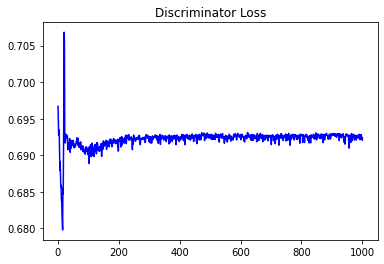

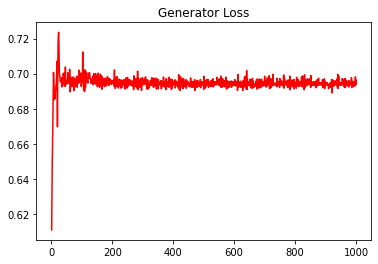

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08137213533998146


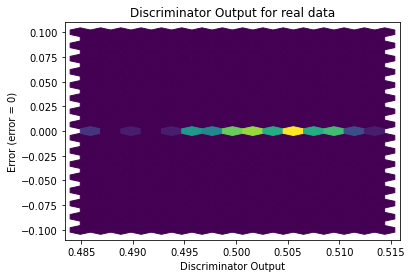

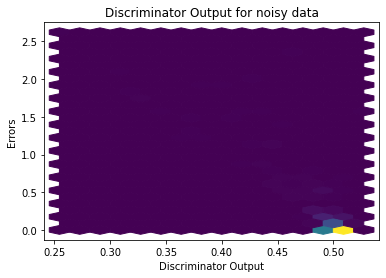

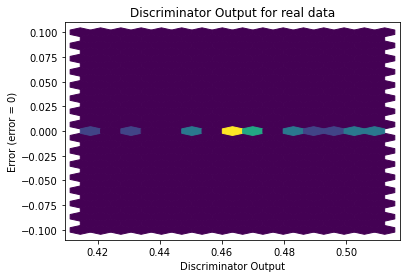

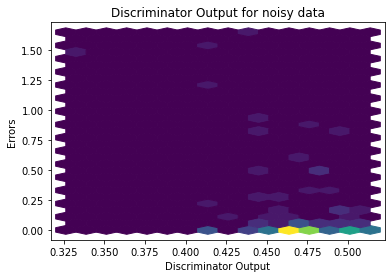

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


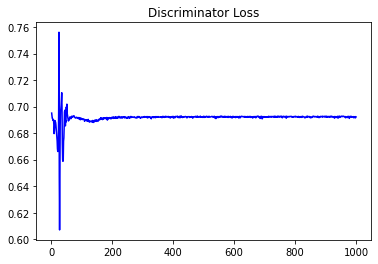

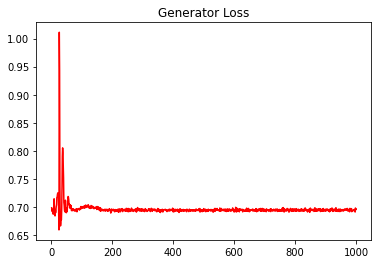

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11176643555755446


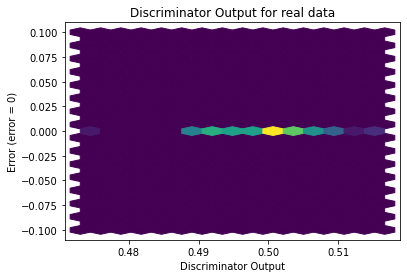

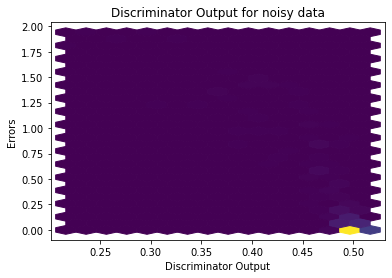

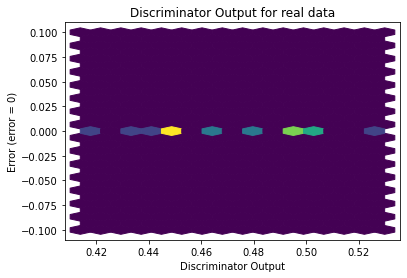

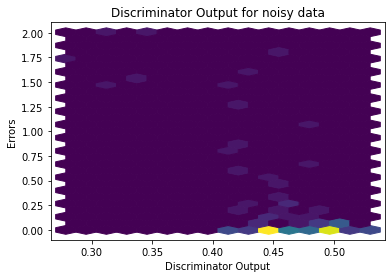

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8126]], requires_grad=True)
